In [29]:
# Importing the necessary libraries first
import yfinance as yahooFinance
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline


In [30]:
# Now we take BITCOIN Prices data using the ticker symbol "BTC-USD"
BitcoinPrice= yahooFinance.Ticker("BTC-USD")


In [31]:
# Getting 10years history of BTC-USD stock price movements; opening and closing prices
dataFrameBTC= BitcoinPrice.history("10Y")


In [32]:
# We can't print all history of 10years here, so we just print the head(1st 5 rows)
print(dataFrameBTC.head())


                                 Open        High         Low       Close  \
Date                                                                        
2014-09-17 00:00:00+00:00  465.864014  468.174011  452.421997  457.334015   
2014-09-18 00:00:00+00:00  456.859985  456.859985  413.104004  424.440002   
2014-09-19 00:00:00+00:00  424.102997  427.834991  384.532013  394.795990   
2014-09-20 00:00:00+00:00  394.673004  423.295990  389.882996  408.903992   
2014-09-21 00:00:00+00:00  408.084991  412.425995  393.181000  398.821014   

                             Volume  Dividends  Stock Splits  
Date                                                          
2014-09-17 00:00:00+00:00  21056800        0.0           0.0  
2014-09-18 00:00:00+00:00  34483200        0.0           0.0  
2014-09-19 00:00:00+00:00  37919700        0.0           0.0  
2014-09-20 00:00:00+00:00  36863600        0.0           0.0  
2014-09-21 00:00:00+00:00  26580100        0.0           0.0  


In [33]:
print(dataFrameBTC.tail())


                                   Open          High           Low  \
Date                                                                  
2024-06-02 00:00:00+00:00  67710.273438  68409.164062  67315.523438   
2024-06-03 00:00:00+00:00  67753.898438  70230.820312  67589.835938   
2024-06-04 00:00:00+00:00  68804.570312  71047.406250  68564.640625   
2024-06-05 00:00:00+00:00  70568.351562  71735.414062  70390.710938   
2024-06-06 00:00:00+00:00  71103.093750  71578.078125  70837.460938   

                                  Close       Volume  Dividends  Stock Splits  
Date                                                                           
2024-06-02 00:00:00+00:00  67751.601562  17110588415        0.0           0.0  
2024-06-03 00:00:00+00:00  68804.781250  32401285324        0.0           0.0  
2024-06-04 00:00:00+00:00  70567.765625  33149696545        0.0           0.0  
2024-06-05 00:00:00+00:00  71082.820312  32810771409        0.0           0.0  
2024-06-06 00:00:00+00

In [34]:
# Know shape of the dataFrame
print(dataFrameBTC.shape)


(3551, 7)


In [35]:
# Shows we have 1260 rows with 7 columns


In [36]:
print(dataFrameBTC.describe()) # describe the dataFrame we have


               Open          High           Low         Close        Volume  \
count   3551.000000   3551.000000   3551.000000   3551.000000  3.551000e+03   
mean   16532.396032  16915.677166  16125.471824  16551.017582  1.726182e+10   
std    18383.950672  18814.813470  17916.553434  18402.373914  1.922316e+10   
min      176.897003    211.731003    171.509995    178.102997  5.914570e+06   
25%     1042.864990   1059.554993   1021.984985   1043.369995  2.362180e+08   
50%     8797.669922   8977.726562   8599.919922   8804.477539  1.313890e+10   
75%    27301.943359  27820.822266  26865.267578  27334.937500  2.786891e+10   
max    73079.375000  73750.070312  71334.093750  73083.500000  3.509679e+11   

       Dividends  Stock Splits  
count     3551.0        3551.0  
mean         0.0           0.0  
std          0.0           0.0  
min          0.0           0.0  
25%          0.0           0.0  
50%          0.0           0.0  
75%          0.0           0.0  
max          0.0        

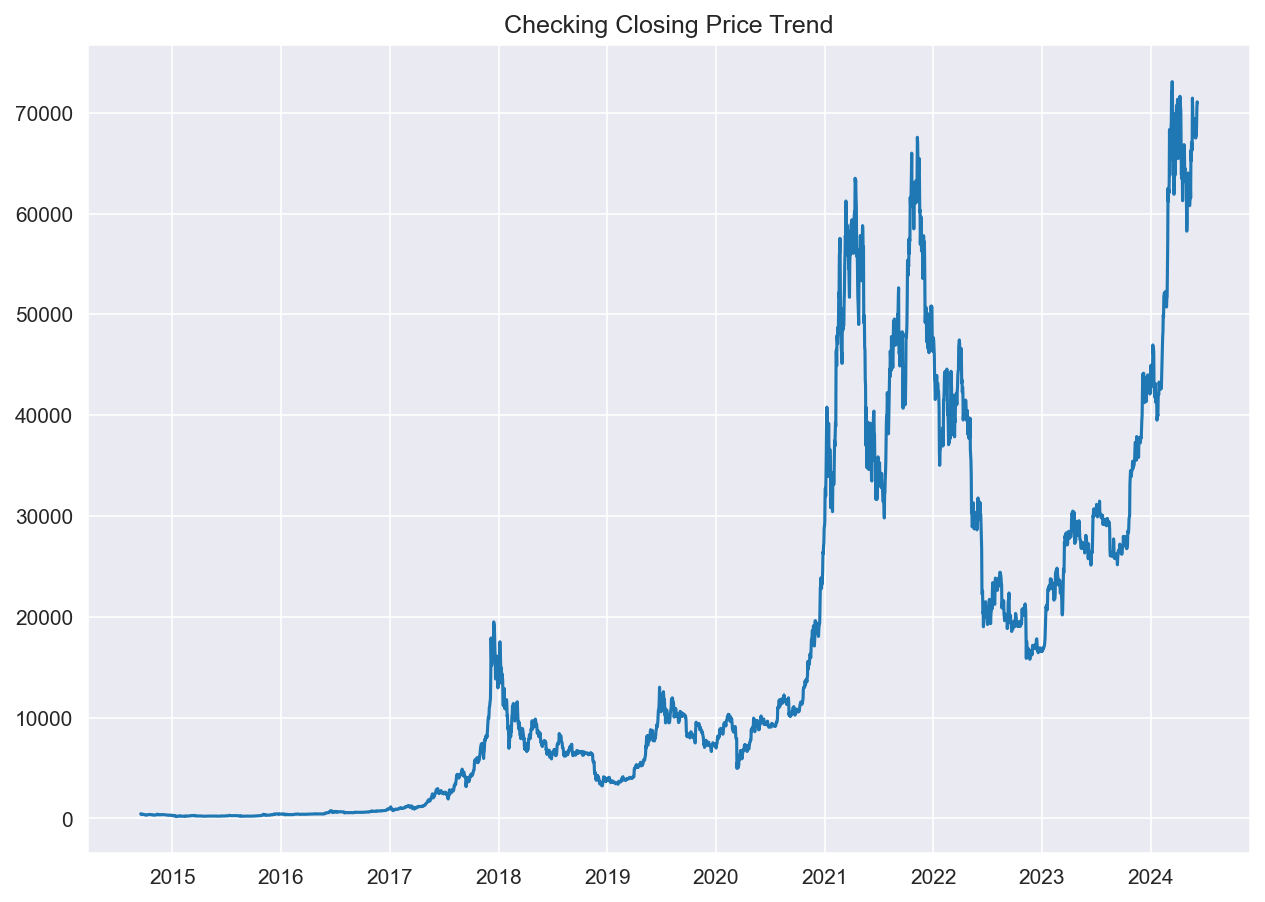

In [37]:
# Checking the overview of the closing price before calculating DMAs
sns.set_style('darkgrid')
plt.figure(figsize= (10,7), dpi=150)
plt.title("Checking Closing Price Trend")
plt.plot(dataFrameBTC["Close"])
plt.show()


In [38]:
# We now calculate the 50DMA(Day Moving Average)
dataFrameBTC["the50_DMA"]= dataFrameBTC["Close"].rolling(50).mean()


In [39]:
# Again, calculate the 200DMA(Day Moving Average)
dataFrameBTC["the200_DMA"]= dataFrameBTC["Close"].rolling(200).mean()


In [40]:
dataFrameBTC.describe()


,Open,High,Low,Close,Volume,Dividends,Stock Splits,the50_DMA,the200_DMA
count,3551.000000,3551.000000,3551.000000,3551.000000,3.551000e+03,3551.0,3551.0,3502.000000,3352.000000
mean,16532.396032,16915.677166,16125.471824,16551.017582,1.726182e+10,0.0,0.0,16312.593583,15705.520256
std,18383.950672,18814.813470,17916.553434,18402.373914,1.922316e+10,0.0,0.0,17811.252596,16054.766293
min,176.897003,211.731003,171.509995,178.102997,5.914570e+06,0.0,0.0,232.261620,245.701329
25%,1042.864990,1059.554993,1021.984985,1043.369995,2.362180e+08,0.0,0.0,1111.823242,1569.529560
50%,8797.669922,8977.726562,8599.919922,8804.477539,1.313890e+10,0.0,0.0,8709.098901,8790.289573
75%,27301.943359,27820.822266,26865.267578,27334.937500,2.786891e+10,0.0,0.0,27388.223613,27571.474419
max,73079.375000,73750.070312,71334.093750,73083.500000,3.509679e+11,0.0,0.0,67553.552734,55114.538340


In [41]:
# Dividends and Stock Splits are invalid, as they are 0.0 all rows. We now remove them

dataFrameBTC.drop(columns= ["Dividends", "Stock Splits"], inplace=True)


In [42]:
#print df head and df tail again
# head
print(dataFrameBTC.head())


                                 Open        High         Low       Close  \
Date                                                                        
2014-09-17 00:00:00+00:00  465.864014  468.174011  452.421997  457.334015   
2014-09-18 00:00:00+00:00  456.859985  456.859985  413.104004  424.440002   
2014-09-19 00:00:00+00:00  424.102997  427.834991  384.532013  394.795990   
2014-09-20 00:00:00+00:00  394.673004  423.295990  389.882996  408.903992   
2014-09-21 00:00:00+00:00  408.084991  412.425995  393.181000  398.821014   

                             Volume  the50_DMA  the200_DMA  
Date                                                        
2014-09-17 00:00:00+00:00  21056800        NaN         NaN  
2014-09-18 00:00:00+00:00  34483200        NaN         NaN  
2014-09-19 00:00:00+00:00  37919700        NaN         NaN  
2014-09-20 00:00:00+00:00  36863600        NaN         NaN  
2014-09-21 00:00:00+00:00  26580100        NaN         NaN  


In [43]:
# for the first 7 in head, we get bull (NaN), because it's calculating Moving Averages


In [44]:
# tail
print(dataFrameBTC.tail())


                                   Open          High           Low  \
Date                                                                  
2024-06-02 00:00:00+00:00  67710.273438  68409.164062  67315.523438   
2024-06-03 00:00:00+00:00  67753.898438  70230.820312  67589.835938   
2024-06-04 00:00:00+00:00  68804.570312  71047.406250  68564.640625   
2024-06-05 00:00:00+00:00  70568.351562  71735.414062  70390.710938   
2024-06-06 00:00:00+00:00  71103.093750  71578.078125  70837.460938   

                                  Close       Volume     the50_DMA  \
Date                                                                 
2024-06-02 00:00:00+00:00  67751.601562  17110588415  64940.290078   
2024-06-03 00:00:00+00:00  68804.781250  32401285324  65001.611172   
2024-06-04 00:00:00+00:00  70567.765625  33149696545  65144.442266   
2024-06-05 00:00:00+00:00  71082.820312  32810771409  65289.861406   
2024-06-06 00:00:00+00:00  70983.734375  25461929984  65484.002266   

           

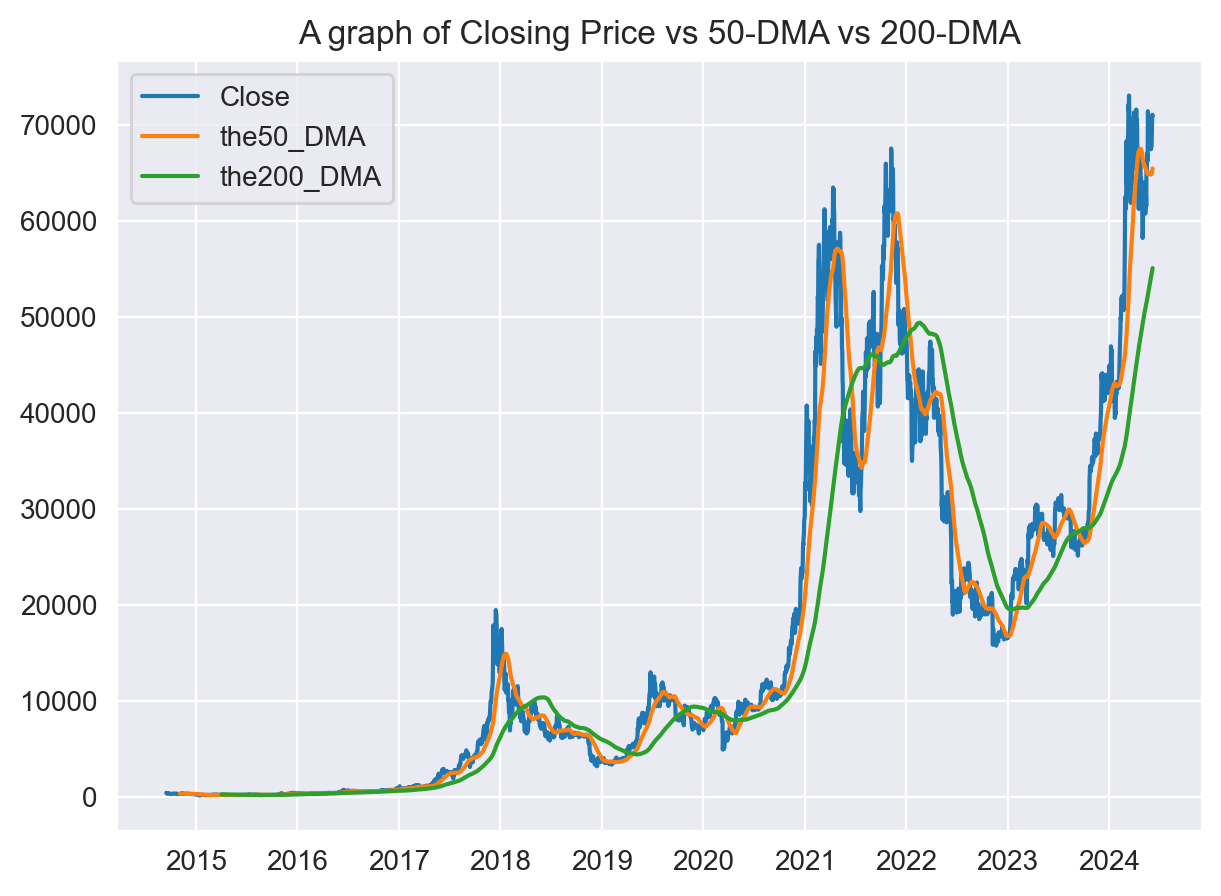

In [45]:
# Print closing Price vs the 50-DMA and the 200-DMA
sns.set_style("darkgrid")
plt.figure(figsize=(7,5), dpi=200)
plt.title("A graph of Closing Price vs 50-DMA vs 200-DMA")
plt.plot(dataFrameBTC["Close"], label="Close")
plt.plot(dataFrameBTC["the50_DMA"], label="the50_DMA")
plt.plot(dataFrameBTC["the200_DMA"], label="the200_DMA")
plt.legend()


# Iferences drawn from the graph:
1. 50DMA and 200DMA are fairly good indicators of how the stock is moving.
2. If the closing price is above the 50DMA or 200DMA, it is usually on the uptrend or bullish.
3. If the closing price is below the 50DMA or 200DMA, it usually means that it is in a downward trend.
4. Every point where 50DMA and 200DMA intersect, the market usually reverses its trend (High -> Low | Low -> High)., they create what we call a market entry point afte confirmation.
5. The huge dip at 2020, indicates the Covid 19 market crash in the month of March .


# Finding the possible future movements of the BITCOIN

In [46]:
# Here, you analyse the correlation between each variables


<Axes: >

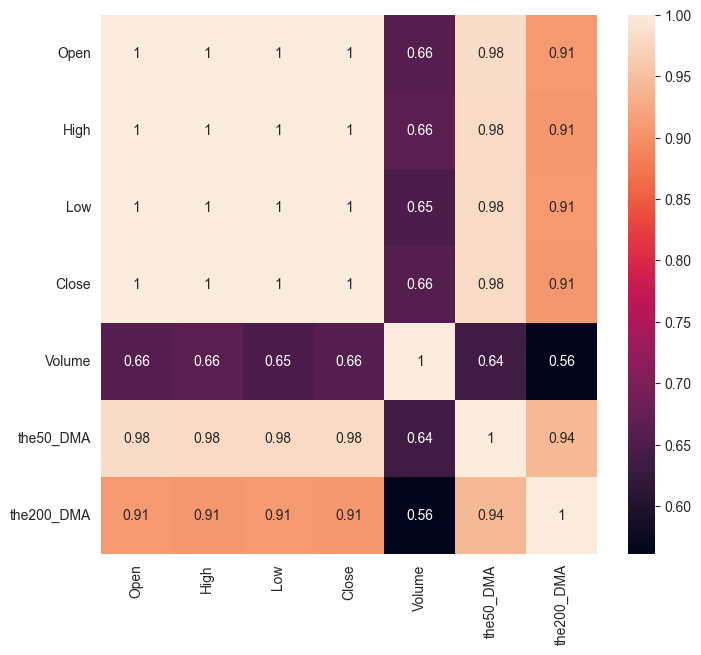

In [47]:
plt.figure(figsize=(8,7), dpi= 100)
sns.heatmap(dataFrameBTC.corr(), annot=True)
# seaborn's heatmap method plots the correlation in the heatmap, and the annot=True shows the numbers on the heatmap 


# Inferences from the heatmap
1. Closing price has very high correlation with almost all the variables except the volume
2. There is a strong multi-collinearity between the variables as well

In [48]:
# We now plot the displot of 50-DMA against the Closing Price


<Axes: title={'center': 'The Distplot of 50 DMA'}, xlabel='the50_DMA', ylabel='Density'>

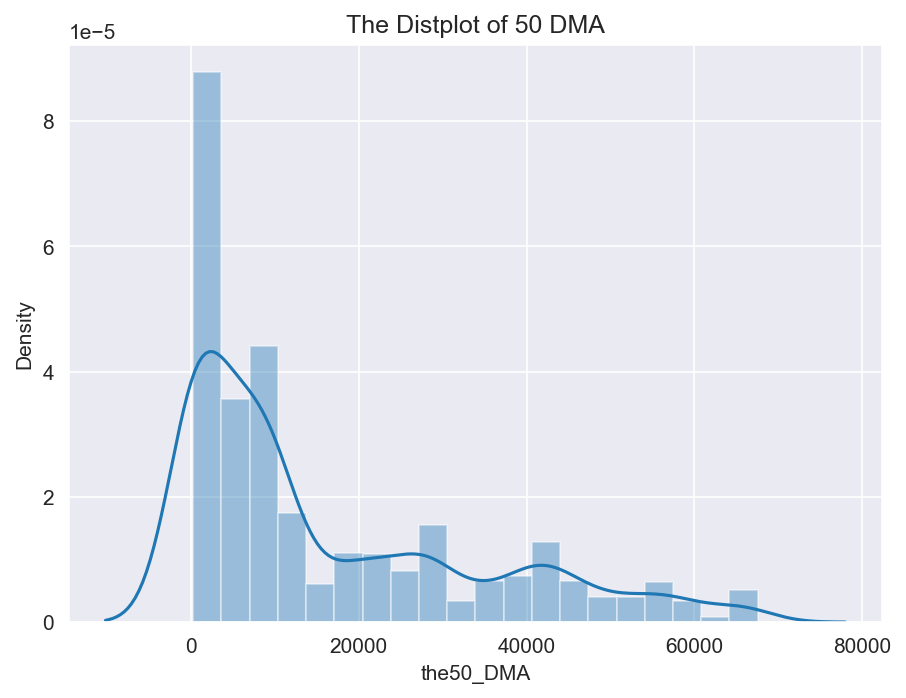

In [49]:
# We now plot the displot of 50-DMA
sns.set_style("darkgrid")
plt.figure(figsize=(7,5), dpi=150)
plt.title("The Distplot of 50 DMA")
sns.distplot(dataFrameBTC["the50_DMA"])


<Axes: title={'center': 'The Distplot of Closing Prices'}, xlabel='Close', ylabel='Density'>

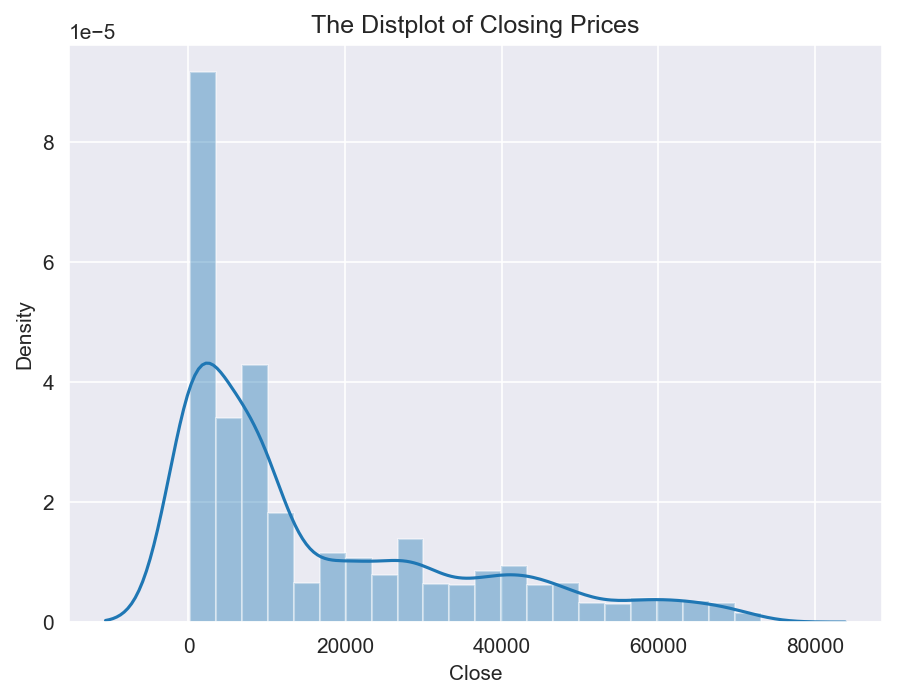

In [50]:
# Again Plot the DistPlot of the Closing Price
sns.set_style("darkgrid")
plt.figure(figsize=(7,5), dpi=150)
plt.title("The Distplot of Closing Prices")
sns.distplot(dataFrameBTC["Close"])


In [51]:
# Both 50DMA and Closing price graphs seem to be following the same distribution
# Now we try to fit the model


In [52]:
import statsmodels.formula.api as smf


In [53]:
model= smf.ols(formula= "Close ~ the50_DMA", data= dataFrameBTC) # we haven't used the 200-DMA becuse it had same distriubution as the 200-DMA..to avaoid multicollinearity.
model= model.fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                 8.543e+04
Date:                Thu, 06 Jun 2024   Prob (F-statistic):               0.00
Time:                        20:15:19   Log-Likelihood:                -33700.
No. Observations:                3502   AIC:                         6.740e+04
Df Residuals:                    3500   BIC:                         6.742e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    233.3990     83.800      2.785      0.005      69.097     397.701
the50_DMA      1.0142      0.003    292.281      0.000       1.007       1.021
==============================================================================
Omnibus:                      503.722   Durbin-Watson:                   0.054
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5217.146
Skew:                           0.325   Prob(JB):                         0.00
Kurtosis:                       8.944   Cond. No.                     3.28e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.28e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [54]:
# The above parameters might not be useful in real life, they are just for the model


# Inferences from the summary
1. Good r2 scores and coef (co-efficient)
2. Since they are very highly correlated, ~1, it isn't wise to fit the model based on the parameters in real life.

In [55]:
# we now plot the graph of closing price, the50_DMA, the200_DMA, and make our observations and inferences..the same we plotted earlier above


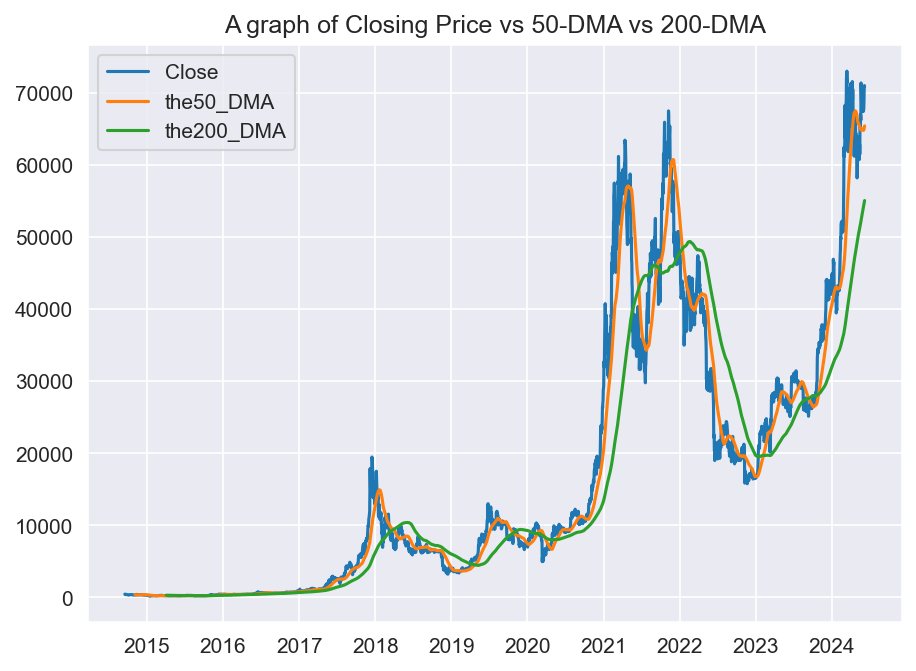

In [56]:
# Print closing Price vs the 50-DMA and the 200-DMA
sns.set_style("darkgrid")
plt.figure(figsize=(7,5), dpi=150)
plt.title("A graph of Closing Price vs 50-DMA vs 200-DMA")
plt.plot(dataFrameBTC["Close"], label="Close")
plt.plot(dataFrameBTC["the50_DMA"], label="the50_DMA")
plt.plot(dataFrameBTC["the200_DMA"], label="the200_DMA")
plt.legend()


# Observations and decision from the graph:
1. 50DMA and 200DMA are fairly good indicators of how the stock is moving.
2. If the closing price is above the 50DMA or 200DMA, it is usually on the uptrend or bullish.
3. If the closing price is below the 50DMA or 200DMA, it usually means that it is in a downward trend.
4. Every point where 50DMA and 200DMA intersect, the market usually reverses its trend (High -> Low | Low -> High).
5. The huge dip at 2020, indicates the Covid 19 market crash in the month of March .
6. From this graph, we can see that the price is above the50_DMA and the200_DMA, which means it'll keep going up
7. The the50_DMA and the200_DMA don't seem to be meeting anytime soon, so the price won't fall steeply incase it starts going down(bearish)
8. The point where the50-DMA and the200-DMA meet is likely the market entry point, and confirmation.